Anomaly detection is the identification of events in a dataset that do not conform to the expected pattern. In application, these vents may be of critical importance.

For example, they maybe  occurences of a network intrusion or of fraud.

We will utilize Isolation forest to detect such anomalies.

Isolation Forest depends on the observation that it is easy to islate an outlier, while more difficult to describe a normal data point.

In [26]:
# import the required libraries and set a random seed
import numpy as np

In [27]:
import pandas as pd

random_seed = np.random.RandomState(12)

In [28]:
# Generate a set of normal observations to be used as training data
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns=["x", "y"])

In [29]:
# Generate a testing set, also consisting of normal observations
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns=["x", "y"])

In [30]:
# Generate a set of outlier observations. These are genereated from a different distribution than the normal observations
X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])

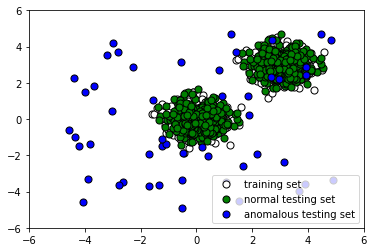

In [31]:
# Let's take a look at the data we have generated
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s=50, edgecolor="black")
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training set", "normal testing set", "anomalous testing set"],
    loc="lower right",
)

plt.show()

In [32]:
# Now we will train an Isolation Forest model on our training data
from sklearn.ensemble import IsolationForest

clf = IsolationForest()
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [33]:
# We will see how the algorithm performs. Append the labels to x_outliers
X_outliers = X_outliers.assign(pred=y_pred_outliers)
X_outliers.head()

,x,y,pred
0,3.947504,2.891003,-1
1,0.413976,-2.025841,-1
2,-2.644476,-3.480783,-1
3,-0.518212,-3.386443,-1
4,2.977669,2.215355,1


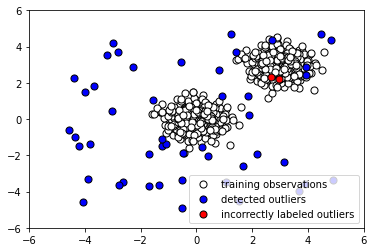

In [34]:
# Let's plot the isolation Forest predictions on the outliers to see how many it caught
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(
    X_outliers.loc[X_outliers.pred == -1, ["x"]],
    X_outliers.loc[X_outliers.pred == -1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_outliers.loc[X_outliers.pred == 1, ["x"]],
    X_outliers.loc[X_outliers.pred == 1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training observations", "detected outliers", "incorrectly labeled outliers"],
    loc="lower right",
)

plt.show()

In [35]:
# Now let's see how it performed on the normal testing data. Append the predicted label to x_test
X_test = X_test.assign(pred=y_pred_test)
X_test.head()

,x,y,pred
0,3.944575,3.866919,-1
1,2.984853,3.142150,1
2,3.501735,2.168262,-1
3,2.906300,3.233826,1
4,3.273225,3.261790,1


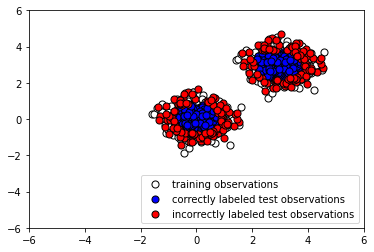

In [36]:
# Now let's plot the results to see whether our classifier labeled the normal testing data correctly.
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(
    X_test.loc[X_test.pred == 1, ["x"]],
    X_test.loc[X_test.pred == 1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_test.loc[X_test.pred == -1, ["x"]],
    X_test.loc[X_test.pred == -1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    [
        "training observations",
        "correctly labeled test observations",
        "incorrectly labeled test observations",
    ],
    loc="lower right",
)

plt.show()

Our model perfomed quite well at capturing the anomalous points . There ware quite a few false negative (instances where normal points were classified as outliers), but by tuning our model's parameters, we may be able to reduce these.



1.   Step 1: loading the liraries that will allow us to manipulate data quickly and easily

1.   Step 2 and 3, we generate a trainign and testing set consisting of normal observations. These have the same distributions
2.   Step 4 we generate the remainder of our testing set by creating outliers. This anomalous dataset has a different distribution from the training data and the rest of the testing data. 


2.   Step 5: By plotting the data, we see that some outlier points look indistinguishable from normal points. this guarantees that our classifier will have a significant percetange of misclassifications due to the nature of the data.


1.   Step 6. We fit an instance of Isolation Forest with default parameters to the training data.


1.   Step 7. we append the predicted lables to X_outliers to examine how algorithm performs
2.   Step 8: We plot the predictions of the Isolation Forest instance on the outliers.


1.   Step 9: We append the predicted labels to X_test in preparation for analysis
2.   Step 10: we plot the predictions of the Isolation Forest Instance on the normal testing data






